<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Borrowed from Mark Bakker in extra-curricular Python course at UNESCO-IHE*


On Feb 21, We started working with this first jupyter notebook developed by Prof. Mark Bakker of TU-Delft.
We finally didn't have time to go through all of it.
Just for your memory and inspiraction this is a fast rap up of what we did and did not completely finish.

TO


## Notebook 1: Basics and Plotting
### First Python steps
Portable, powerful, and a breeze to use, Python is a popular, open-source programming language used for both scripting applications and standalone programs. Python can be used to do pretty much anything.

### <a name="ex1"></a> Exercise 1, First Python code
Compute the value of the polynomial

$y_1=ax^2+bx+c$ at a large number of $x$ values=-2$ using

$a=-6$, $b=-4$, $c=-2$, $d=1$, $e=4$, $f=6$

We also add a 5th degree polynomial:

$y_2 = (x - a) (x - b ) (x - c ) (x - d) (x - e) (x -f)$

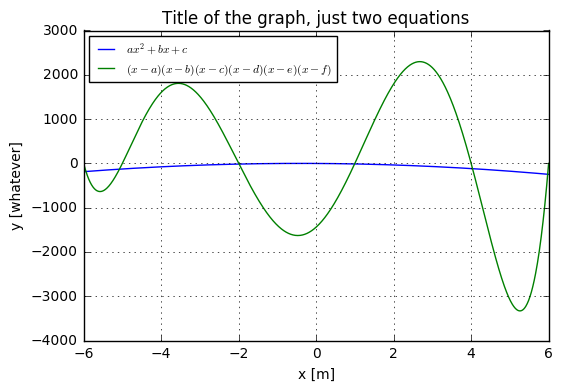

In [61]:
import numpy as np                # functionality to use numeric arrays
import matplotlib.pyplot as plt   # functionality to plot

a = -6 
b = -5
c = -2
d =  1
e =  4
f =  6

x = np.linspace(-6, 6, 1000) # 1000 x-values between -6 and 6

# Compute the polynomials for 1000 points at once
y1 = a * x**2 + b * x + c
y2 = (x - a) * (x - b )* (x - c ) * (x - d) * (x - e) * (x -f)

# to put the equations in the graph, put them in strings between $ $
eq1 = '$a x^2 + b x + c$'
eq2 = '$(x - a) (x - b ) (x - c ) (x - d) (x - e) (x -f)$'

plt.plot(x,y1, label=eq1)  # use these equations as label
plt.plot(x,y2, label=eq2)

plt.title('Title of the graph, just two equations')
plt.xlabel('x [m]')
plt.ylabel('y [whatever]')
plt.grid(True)
plt.legend(loc='best', fontsize='small')  # this plots the legend with the equation labels

plt.show() # need this to actually show the plot

## Simultaneously plot three graphs

This shows a way to read data from the current directory and then plot these in a single figure.

The data file need to be in your directory, so copy them first from the corresponding directory of the notebooks by Mark Bakker (notebook 1)

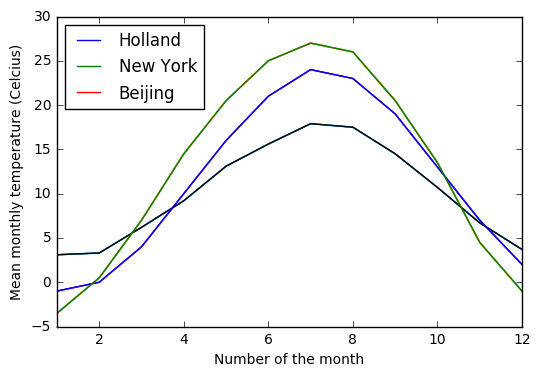

In [65]:
holland = np.loadtxt('holland_temperature.dat')
newyork= np.loadtxt('newyork_temperature.dat')
beijing = np.loadtxt('beijing_temperature.dat')

plt.plot(np.linspace(1, 12, 12), holland)
plt.plot(np.linspace(1, 12, 12), newyork)
plt.plot(np.linspace(1, 12, 12), beijing)

plt.xlabel('Number of the month')
plt.ylabel('Mean monthly temperature (Celcius)')

plt.xlim(1, 12)

# the labels are given in legend, instead of  with each plot like we did before
plt.legend(['Holland','New York','Beijing'], loc='best');

plt.show()

## Use more than one axis, i.e. using everal subplots( )

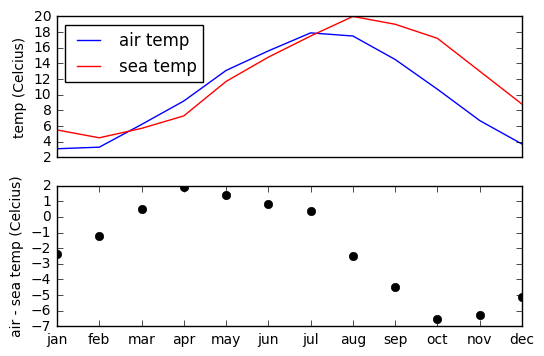

In [66]:
# read the data from the current directory
air = np.loadtxt('holland_temperature.dat') 
sea = np.loadtxt('holland_seawater.dat')

# specifiy two plots vertically 2 rows 1 column
# and generate first axis of them
plt.subplot(211)  # plt.subplot(2, 1, 1) is the same

# plot the actual two lines and use a label for each of them
plt.plot(air, 'b', label='air temp')
plt.plot(sea, 'r', label='sea temp')

plt.legend(loc='best') # show legend

plt.ylabel('temp (Celcius)')

plt.xlim(0, 11) # set the limits of the x-axis of the graph
plt.xticks([]) # don't plot ticks along the x-axis

plt.subplot(212) # generate second subplot
plt.plot(air-sea, 'ko')

# generate the tick labels explicitly
plt.xticks(np.linspace(0, 11, 12),
           ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

plt.xlim(0, 11)

plt.ylabel('air - sea temp (Celcius)');

plt.show()

### Gallery of graphs
The plotting package `matplotlib` allows you to make very fancy graphs. Check out the <A href="http://matplotlib.org/gallery.html"  target=_blank>matplotlib gallery</A> to get an overview of many of the options. The following exercises use several of the matplotlib options.

### <a name="ex5"></a> Exercise 5, Pie Chart
At the 2012 London Olympics, the top ten countries (plus the rest) receiving gold medals were `['USA', 'CHN', 'GBR', 'RUS', 'KOR', 'GER', 'FRA', 'ITA', 'HUN', 'AUS', 'OTHER']`. They received  `[46, 38, 29, 24, 13, 11, 11, 8, 8, 7, 107]` gold medals, respectively. Make a pie chart (type `plt.pie?` or go to the pie charts in the matplotlib gallery) of the top 10 gold medal winners plus the others at the London Olympics. Try some of the keyword arguments to make the plot look nice. You may want to give the command `plt.axis('equal')` to make the scales along the horizontal and vertical axes equal so that the pie actually looks like a circle rather than an ellipse. There are four different ways to specify colors in matplotlib plotting; you may read about it [here](http://matplotlib.org/examples/pylab_examples/color_demo.html). The coolest way is to use the html color names. Use the `colors` keyword in your pie chart to specify a sequence of colors. The sequence must be between square brackets, each color must be between quotes preserving upper and lower cases, and they must be separated by comma's like `['MediumBlue','SpringGreen','BlueViolet']`; the sequence is repeated if it is not long enough. The html names for the colors may be found, for example, [here](http://en.wikipedia.org/wiki/Web_colors).

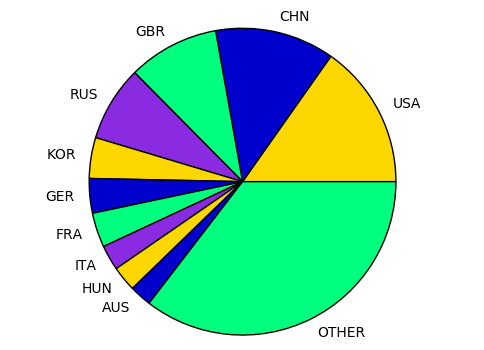

In [67]:
gold = [46, 38, 29, 24, 13, 11, 11, 8, 8, 7, 107]
countries = ['USA', 'CHN', 'GBR', 'RUS', 'KOR', 'GER', 'FRA', 'ITA', 'HUN', 'AUS', 'OTHER']

# use pie graph this time
plt.pie(gold, labels = countries, colors = ['Gold', 'MediumBlue', 'SpringGreen', 'BlueViolet'])
plt.axis('equal');
plt.show()

### <a name="ex6"></a> Exercise 6, Fill between
Load the air and sea temperature, as used in Exercise 4, but this time make one plot of temperature vs the number of the month and use the `plt.fill_between` command to fill the space between the curve and the $x$-axis. Specify the `alpha` keyword, which defines the transparancy. Some experimentation will give you a good value for alpha (stay between 0 and 1). Note that you need to specify the color using the `color` keyword argument.

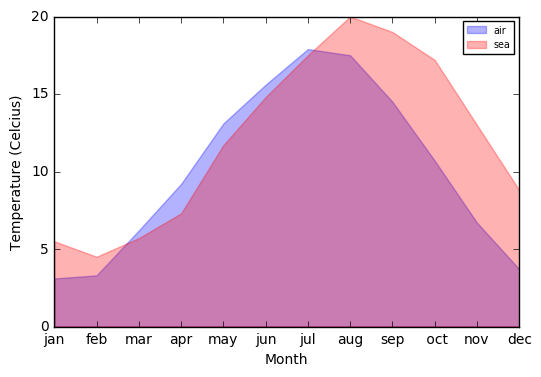

In [73]:
air = np.loadtxt('holland_temperature.dat') 
sea = np.loadtxt('holland_seawater.dat')

# use fill_between graph this time
# range(12) generates values 0, 1, 2, 3, ... 11 (used for months, 0=jan)
plt.fill_between(range(12), air, color='b', alpha=0.3, label='air') # alpha is degree of transparency
plt.fill_between(range(12), sea, color='r', alpha=0.3, label='sea')

# this is quite sophisticated: the plot 
# the \ after 'apr' is line continuation

plt.xticks(np.linspace(0, 11, 12), ['jan', 'feb', 'mar', 'apr',\
           'may', 'jun', 'jul', 'aug', 'sep', ' oct', 'nov', 'dec'])

plt.xlim(0, 11)
plt.ylim(0, 20)

plt.xlabel('Month')
plt.ylabel('Temperature (Celcius)')

plt.legend(loc='best', fontsize='x-small')

plt.show()